In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
csvData = pd.read_csv("2024_LoL_esports_match_data.csv", encoding = "ISO-8859-1");
df = pd.DataFrame(csvData);

# It can flit out non complete data
df = df[df['datacompleteness'] != 'partial'];

# It can flit out non season 14 data
df = df[df['patch'] != 13.24];

# id types data are meaning for data analysis
df = df.drop(columns=['ï»¿gameid', 'url', 'teamid', 'participantid', 'playerid', 'playoffs', 'datacompleteness', 'patch', 'teamkills', 'teamdeaths']);

df = df.drop(columns=['firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim']);

# Each round of competition only spawn 3 types of elementdrakes, it make 'elementdrakes' datas useless
df = df.drop(columns=['firstdragon', 'dragons', 'elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'dragons (type unknown)', 'elders', 
                      'firstherald', 'heralds', 'firstbaron', 'barons'])

df = df.drop(columns=['firsttower', 'towers', 'firstmidtower', 'firsttothreetowers', 'turretplates' , 'inhibitors']);

# There are 2 teams in each round
# blue side opp data refers to red side data, which mean include 'opp_' keywords data are duplicate 
df = df[df.columns.drop(list(df.filter(regex='opp_')))];

In [117]:
print(df.columns);

Index(['league', 'year', 'split', 'date', 'game', 'side', 'position',
       'playername', 'teamname', 'champion', 'ban1', 'ban2', 'ban3', 'ban4',
       'ban5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'team kpm',
       'ckpm', 'damagetochampions', 'dpm', 'damageshare',
       'damagetakenperminute', 'damagemitigatedperminute', 'wardsplaced',
       'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore',
       'vspm', 'totalgold', 'earnedgold', 'earned gpm', 'earnedgoldshare',
       'goldspent', 'gspd', 'total cs', 'minionkills', 'monsterkills',
       'monsterkillsownjungle', 'monsterkillsenemyjungle', 'cspm', 'goldat10',
       'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10',
       'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15'],
      dtype='object')


In [119]:
print(df.dtypes);

league          object
year             int64
split           object
date            object
game             int64
                ...   
xpdiffat15     float64
csdiffat15     float64
killsat15      float64
assistsat15    float64
deathsat15     float64
Length: 68, dtype: object


In [121]:
print(df.describe());

          year          game    gamelength        result         kills  \
count  10032.0  10032.000000  10032.000000  10032.000000  10032.000000   
mean    2024.0      1.303828   1927.387560      0.500000      4.598884   
std        0.0      0.560730    329.385127      0.500025      5.581703   
min     2024.0      1.000000   1271.000000      0.000000      0.000000   
25%     2024.0      1.000000   1689.000000      0.000000      1.000000   
50%     2024.0      1.000000   1884.500000      0.500000      3.000000   
75%     2024.0      2.000000   2133.000000      1.000000      6.000000   
max     2024.0      3.000000   3226.000000      1.000000     39.000000   

             deaths       assists   doublekills   triplekills   quadrakills  \
count  10032.000000  10032.000000  10032.000000  10032.000000  10032.000000   
mean       4.609250     10.748604      0.520933      0.087719      0.012959   
std        5.336361     12.868940      0.968428      0.318694      0.115715   
min        0.0000

In [151]:
# It convert flit out data to csv format
df.to_csv('LoL_esports_s14_match_data.csv');

csvData = pd.read_csv('LoL_esports_s14_match_data.csv');
df = pd.DataFrame(csvData);

In [153]:
# Get teams rows data and flit out meaningless data for analysis
TeamDF = df[df['position'] == 'team'];
TeamDF = TeamDF.reset_index();
TeamDF.index = TeamDF.index + 1;
TeamDF = TeamDF.drop(columns=['index', 'playername', 'champion', 'earnedgold', 'total cs', 'cspm', 'minionkills', 'damageshare']);
print(TeamDF);

      Unnamed: 0.1  Unnamed: 0 league  year    split             date  game  \
1               10         226    LEC  2024   Winter  13/1/2024 16:10     1   
2               11         227    LEC  2024   Winter  13/1/2024 16:10     1   
3               22         238    LEC  2024   Winter  13/1/2024 17:06     1   
4               23         239    LEC  2024   Winter  13/1/2024 17:06     1   
5               34         250    LEC  2024   Winter  13/1/2024 18:15     1   
...            ...         ...    ...   ...      ...              ...   ...   
1668         10007       12251    LCO  2024  Split 1   13/2/2024 7:57     2   
1669         10018       12262    LCO  2024  Split 1   13/2/2024 9:41     1   
1670         10019       12263    LCO  2024  Split 1   13/2/2024 9:41     1   
1671         10030       12274    LCO  2024  Split 1  13/2/2024 10:28     2   
1672         10031       12275    LCO  2024  Split 1  13/2/2024 10:28     2   

      side position            teamname  ... deaths

In [155]:
# In League of Legend, it have 2 side (Blue and Red)
BlueTeamDF = TeamDF[TeamDF['side'] == 'Blue'];
BlueTeamDF = BlueTeamDF.reset_index();
BlueTeamDF.index = BlueTeamDF.index + 1;
BlueTeamDF = BlueTeamDF.drop(columns=['index']);
print(BlueTeamDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              10         226     LEC  2024   Winter  13/1/2024 16:10     1   
2              22         238     LEC  2024   Winter  13/1/2024 17:06     1   
3              34         250     LEC  2024   Winter  13/1/2024 18:15     1   
4              46         262     LEC  2024   Winter  13/1/2024 19:24     1   
5              58         274     LEC  2024   Winter  13/1/2024 20:28     1   
..            ...         ...     ...   ...      ...              ...   ...   
832          9982       12226  CBLOLA  2024  Split 1  12/2/2024 21:30     1   
833          9994       12238     LCO  2024  Split 1   13/2/2024 7:07     1   
834         10006       12250     LCO  2024  Split 1   13/2/2024 7:57     2   
835         10018       12262     LCO  2024  Split 1   13/2/2024 9:41     1   
836         10030       12274     LCO  2024  Split 1  13/2/2024 10:28     2   

     side position            teamname  ... deathsa

In [157]:
print(BlueTeamDF.columns);

Index(['Unnamed: 0.1', 'Unnamed: 0', 'league', 'year', 'split', 'date', 'game',
       'side', 'position', 'teamname', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5',
       'gamelength', 'result', 'kills', 'deaths', 'assists', 'doublekills',
       'triplekills', 'quadrakills', 'pentakills', 'team kpm', 'ckpm',
       'damagetochampions', 'dpm', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earned gpm',
       'earnedgoldshare', 'goldspent', 'gspd', 'monsterkills',
       'monsterkillsownjungle', 'monsterkillsenemyjungle', 'goldat10',
       'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10',
       'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15'],
      dtype='object')


In [159]:
print(BlueTeamDF.dtypes);

Unnamed: 0.1      int64
Unnamed: 0        int64
league           object
year              int64
split            object
                 ...   
xpdiffat15      float64
csdiffat15      float64
killsat15       float64
assistsat15     float64
deathsat15      float64
Length: 63, dtype: object


In [161]:
print(BlueTeamDF.describe());

       Unnamed: 0.1    Unnamed: 0    year        game   gamelength  \
count    836.000000    836.000000   836.0  836.000000   836.000000   
mean    5020.000000   6221.693780  2024.0    1.303828  1927.387560   
std     2897.720483   3698.938182     0.0    0.561038   329.565877   
min       10.000000    226.000000  2024.0    1.000000  1271.000000   
25%     2515.000000   2869.000000  2024.0    1.000000  1689.000000   
50%     5020.000000   6316.000000  2024.0    1.000000  1884.500000   
75%     7525.000000   9577.000000  2024.0    2.000000  2133.000000   
max    10030.000000  12274.000000  2024.0    3.000000  3226.000000   

           result       kills      deaths     assists  doublekills  ...  \
count  836.000000  836.000000  836.000000  836.000000   836.000000  ...   
mean     0.538278   14.340909   13.281100   33.460526     1.623206  ...   
std      0.498831    6.889186    7.267262   17.657612     1.454421  ...   
min      0.000000    0.000000    0.000000    0.000000     0.000000  .

In [163]:
# In League of Legend, it have 2 side (Blue and Red)
RedTeamDF = TeamDF[TeamDF['side'] == 'Red'];
RedTeamDF = RedTeamDF.reset_index();
RedTeamDF.index = RedTeamDF.index + 1;
RedTeamDF = RedTeamDF.drop(columns=['index']);
print(RedTeamDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              11         227     LEC  2024   Winter  13/1/2024 16:10     1   
2              23         239     LEC  2024   Winter  13/1/2024 17:06     1   
3              35         251     LEC  2024   Winter  13/1/2024 18:15     1   
4              47         263     LEC  2024   Winter  13/1/2024 19:24     1   
5              59         275     LEC  2024   Winter  13/1/2024 20:28     1   
..            ...         ...     ...   ...      ...              ...   ...   
832          9983       12227  CBLOLA  2024  Split 1  12/2/2024 21:30     1   
833          9995       12239     LCO  2024  Split 1   13/2/2024 7:07     1   
834         10007       12251     LCO  2024  Split 1   13/2/2024 7:57     2   
835         10019       12263     LCO  2024  Split 1   13/2/2024 9:41     1   
836         10031       12275     LCO  2024  Split 1  13/2/2024 10:28     2   

    side position             teamname  ... deathsa

In [165]:
print(RedTeamDF.columns);

Index(['Unnamed: 0.1', 'Unnamed: 0', 'league', 'year', 'split', 'date', 'game',
       'side', 'position', 'teamname', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5',
       'gamelength', 'result', 'kills', 'deaths', 'assists', 'doublekills',
       'triplekills', 'quadrakills', 'pentakills', 'team kpm', 'ckpm',
       'damagetochampions', 'dpm', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earned gpm',
       'earnedgoldshare', 'goldspent', 'gspd', 'monsterkills',
       'monsterkillsownjungle', 'monsterkillsenemyjungle', 'goldat10',
       'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10',
       'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15'],
      dtype='object')


In [167]:
print(RedTeamDF.dtypes);

Unnamed: 0.1      int64
Unnamed: 0        int64
league           object
year              int64
split            object
                 ...   
xpdiffat15      float64
csdiffat15      float64
killsat15       float64
assistsat15     float64
deathsat15      float64
Length: 63, dtype: object


In [169]:
print(RedTeamDF.describe());

       Unnamed: 0.1    Unnamed: 0    year        game   gamelength  \
count    836.000000    836.000000   836.0  836.000000   836.000000   
mean    5021.000000   6222.693780  2024.0    1.303828  1927.387560   
std     2897.720483   3698.938182     0.0    0.561038   329.565877   
min       11.000000    227.000000  2024.0    1.000000  1271.000000   
25%     2516.000000   2870.000000  2024.0    1.000000  1689.000000   
50%     5021.000000   6317.000000  2024.0    1.000000  1884.500000   
75%     7526.000000   9578.000000  2024.0    2.000000  2133.000000   
max    10031.000000  12275.000000  2024.0    3.000000  3226.000000   

           result       kills      deaths     assists  doublekills  ...  \
count  836.000000  836.000000  836.000000  836.000000   836.000000  ...   
mean     0.461722   13.252392   14.374402   31.031100     1.502392  ...   
std      0.498831    7.274741    6.886054   18.757871     1.565724  ...   
min      0.000000    0.000000    0.000000    0.000000     0.000000  .

In [171]:
# ['result'] == 1 refers to win the game
RedTeamWinDF = RedTeamDF[RedTeamDF['result'] == 1];
RedTeamWinDF = RedTeamWinDF.reset_index();
RedTeamWinDF.index = RedTeamWinDF.index + 1;
RedTeamWinDF = RedTeamWinDF.drop(columns=['index']);
print(RedTeamWinDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              11         227     LEC  2024   Winter  13/1/2024 16:10     1   
2              23         239     LEC  2024   Winter  13/1/2024 17:06     1   
3              35         251     LEC  2024   Winter  13/1/2024 18:15     1   
4              47         263     LEC  2024   Winter  13/1/2024 19:24     1   
5              71         287     LEC  2024   Winter  14/1/2024 16:38     1   
..            ...         ...     ...   ...      ...              ...   ...   
382          9959       12203     LEC  2024   Winter  12/2/2024 19:51     3   
383          9971       12215  CBLOLA  2024  Split 1  12/2/2024 19:59     1   
384         10007       12251     LCO  2024  Split 1   13/2/2024 7:57     2   
385         10019       12263     LCO  2024  Split 1   13/2/2024 9:41     1   
386         10031       12275     LCO  2024  Split 1  13/2/2024 10:28     2   

    side position                 teamname  ... dea

In [173]:
# ['result'] == 1 refers to win the game
BlueTeamWinDF = BlueTeamDF[BlueTeamDF['result'] == 1];
BlueTeamWinDF = BlueTeamWinDF.reset_index();
BlueTeamWinDF.index = BlueTeamWinDF.index + 1;
BlueTeamWinDF = BlueTeamWinDF.drop(columns=['index']);
print(BlueTeamWinDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              58         274     LEC  2024   Winter  13/1/2024 20:28     1   
2              94         310     LEC  2024   Winter  14/1/2024 18:59     1   
3             106         322     LEC  2024   Winter  14/1/2024 19:55     1   
4             130         346     LCO  2024  Split 1   15/1/2024 7:06     1   
5             142         358     LCO  2024  Split 1   15/1/2024 8:26     2   
..            ...         ...     ...   ...      ...              ...   ...   
446          9922       12166     LEC  2024   Winter  12/2/2024 18:06     1   
447          9934       12178  CBLOLA  2024  Split 1  12/2/2024 19:05     1   
448          9946       12190     LEC  2024   Winter  12/2/2024 19:07     2   
449          9982       12226  CBLOLA  2024  Split 1  12/2/2024 21:30     1   
450          9994       12238     LCO  2024  Split 1   13/2/2024 7:07     1   

     side position            teamname  ... deathsa

In [175]:
# ['result'] == 0 refers to lose the game
BlueTeamLoseDF = BlueTeamDF[BlueTeamDF['result'] == 0];
BlueTeamLoseDF = BlueTeamLoseDF.reset_index();
BlueTeamLoseDF.index = BlueTeamLoseDF.index + 1;
BlueTeamLoseDF = BlueTeamLoseDF.drop(columns=['index']);
print(BlueTeamLoseDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              10         226     LEC  2024   Winter  13/1/2024 16:10     1   
2              22         238     LEC  2024   Winter  13/1/2024 17:06     1   
3              34         250     LEC  2024   Winter  13/1/2024 18:15     1   
4              46         262     LEC  2024   Winter  13/1/2024 19:24     1   
5              70         286     LEC  2024   Winter  14/1/2024 16:38     1   
..            ...         ...     ...   ...      ...              ...   ...   
382          9958       12202     LEC  2024   Winter  12/2/2024 19:51     3   
383          9970       12214  CBLOLA  2024  Split 1  12/2/2024 19:59     1   
384         10006       12250     LCO  2024  Split 1   13/2/2024 7:57     2   
385         10018       12262     LCO  2024  Split 1   13/2/2024 9:41     1   
386         10030       12274     LCO  2024  Split 1  13/2/2024 10:28     2   

     side position       teamname  ... deathsat10 g

In [177]:
# ['result'] == 0 refers to lose the game
RedTeamLoseDF = RedTeamDF[RedTeamDF['result'] == 0];
RedTeamLoseDF = RedTeamLoseDF.reset_index();
RedTeamLoseDF.index = RedTeamLoseDF.index + 1;
RedTeamLoseDF = RedTeamLoseDF.drop(columns=['index']);
print(RedTeamLoseDF);

     Unnamed: 0.1  Unnamed: 0  league  year    split             date  game  \
1              59         275     LEC  2024   Winter  13/1/2024 20:28     1   
2              95         311     LEC  2024   Winter  14/1/2024 18:59     1   
3             107         323     LEC  2024   Winter  14/1/2024 19:55     1   
4             131         347     LCO  2024  Split 1   15/1/2024 7:06     1   
5             143         359     LCO  2024  Split 1   15/1/2024 8:26     2   
..            ...         ...     ...   ...      ...              ...   ...   
446          9923       12167     LEC  2024   Winter  12/2/2024 18:06     1   
447          9935       12179  CBLOLA  2024  Split 1  12/2/2024 19:05     1   
448          9947       12191     LEC  2024   Winter  12/2/2024 19:07     2   
449          9983       12227  CBLOLA  2024  Split 1  12/2/2024 21:30     1   
450          9995       12239     LCO  2024  Split 1   13/2/2024 7:07     1   

    side position             teamname  ... deathsa

In [179]:
def plot_boxplot(data, column, title):
    sns.boxplot(data=data, x=column).set_title(title);
    sns.despine();
    plt.show();

def plot_scatterplot(data1, data2, column1, column2, color1, color2, label1, label2, LabelX, LabelY, Title):
    plt.scatter(data=data1, x=column1, y=column2, c=color1, label=label1);
    plt.scatter(data=data2, x=column1, y=column2, c=color2, label=label2);
    plt.xlabel(LabelX);
    plt.ylabel(LabelY);
    plt.legend();
    plt.title(Title);
    plt.show();

def plot_pairplot(data, columns):
    sns.pairplot(data=data, vars=columns);
    sns.despine();
    plt.show();

def plot_heatmap(data):
    sns.heatmap(data.corr(), cmap='coolwarm', annot=True);
    plt.title('Correlation heatmap');
    sns.despine();
    plt.show();

In [181]:
RedWin = 'Red Side (Win)';
RedLose = 'Red Side (Lose)';
BlueWin = 'Blue Side (Win)';
BlueLose = 'Blue Side (Lose)';

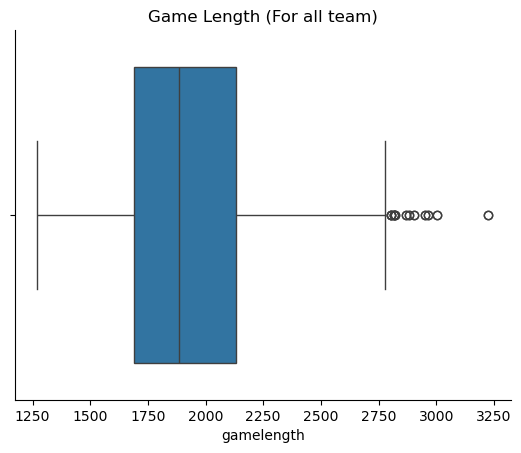

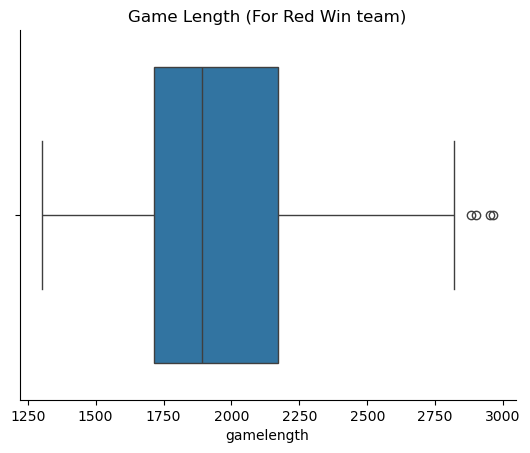

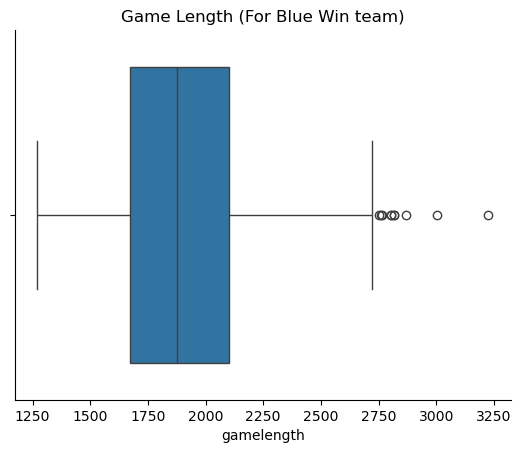

In [183]:
Title = 'Game Length ';
CompareValue = 'gamelength';

# Compare all the game length data in csv
plot_boxplot(TeamDF, CompareValue, Title + '(For all team)');

# Get the average game length data at red team
plot_boxplot(RedTeamWinDF, CompareValue, Title + '(For Red Win team)');

# Get the average game length data in blue team
plot_boxplot(BlueTeamWinDF, CompareValue, Title + '(For Blue Win team)');

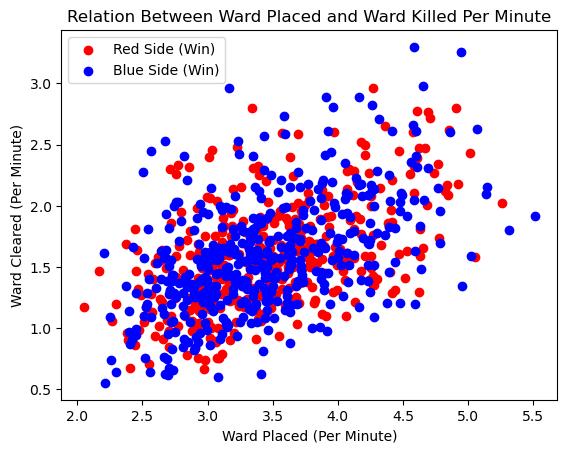

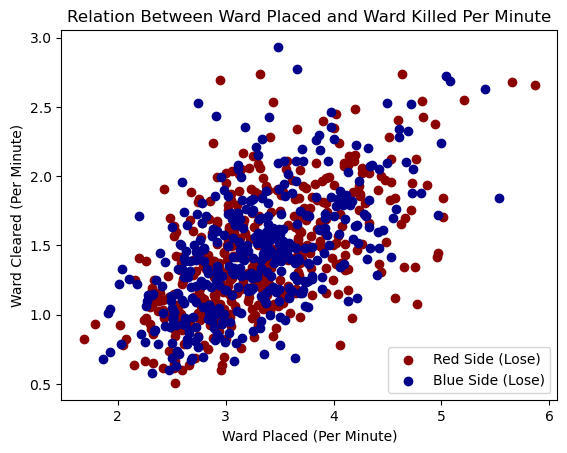

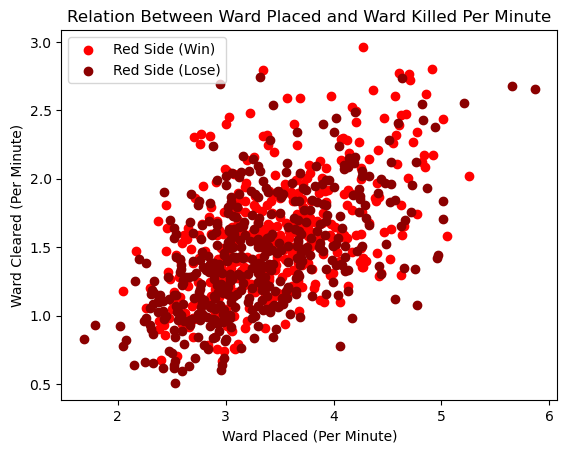

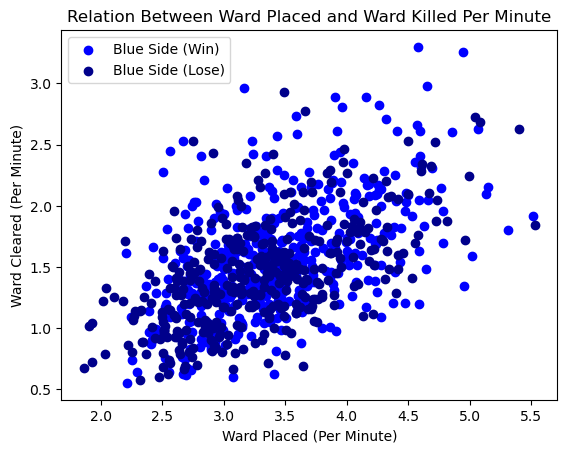

In [185]:
LabelX = 'Ward Placed (Per Minute)';
LabelY = 'Ward Cleared (Per Minute)';
Title = 'Relation Between Ward Placed and Ward Killed Per Minute';

# Compare Ward Place and Ward Kill per minute (Win Team at both side)
plot_scatterplot(RedTeamWinDF, BlueTeamWinDF, 'wpm', 'wcpm', 'red', 'blue', RedWin, BlueWin,
            LabelX, LabelY, Title);

# Compare Ward Place and Ward Kill per minute (Lose Team at both side)
plot_scatterplot(RedTeamLoseDF, BlueTeamLoseDF,'wpm', 'wcpm', 'darkred', 'darkblue',RedLose, BlueLose,
            LabelX, LabelY, Title);

# Compare Ward Place and Ward Kill per minute (At Red side)
plot_scatterplot(RedTeamWinDF, RedTeamLoseDF, 'wpm', 'wcpm', 'red', 'darkred', RedWin, RedLose, 
            LabelX, LabelY, Title);

# Compare Ward Place and Ward Kill per minute (At Blue side)
plot_scatterplot(BlueTeamWinDF, BlueTeamLoseDF, 'wpm', 'wcpm', 'blue', 'darkblue', BlueWin, BlueLose, 
            LabelX, LabelY, Title);

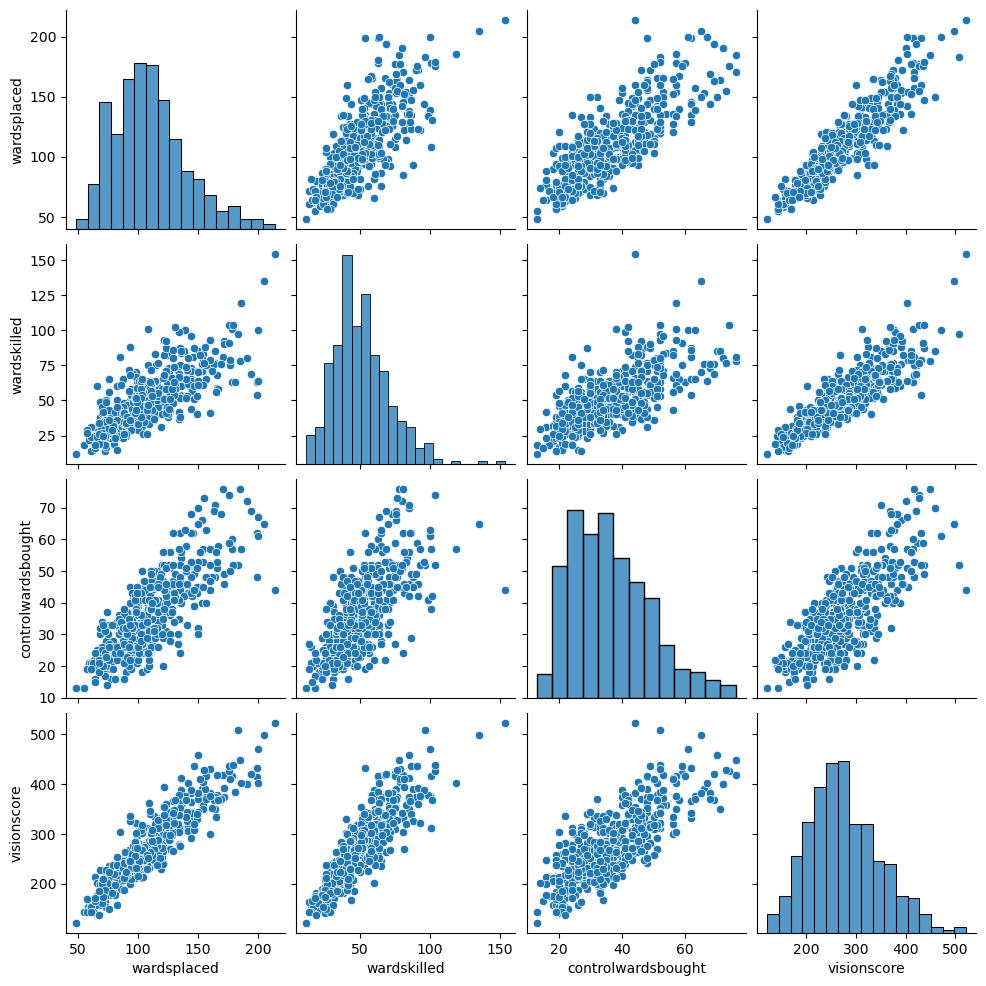

In [187]:
plot_pairplot(BlueTeamWinDF,['wardsplaced', 'wardskilled', 'controlwardsbought', 'visionscore']);

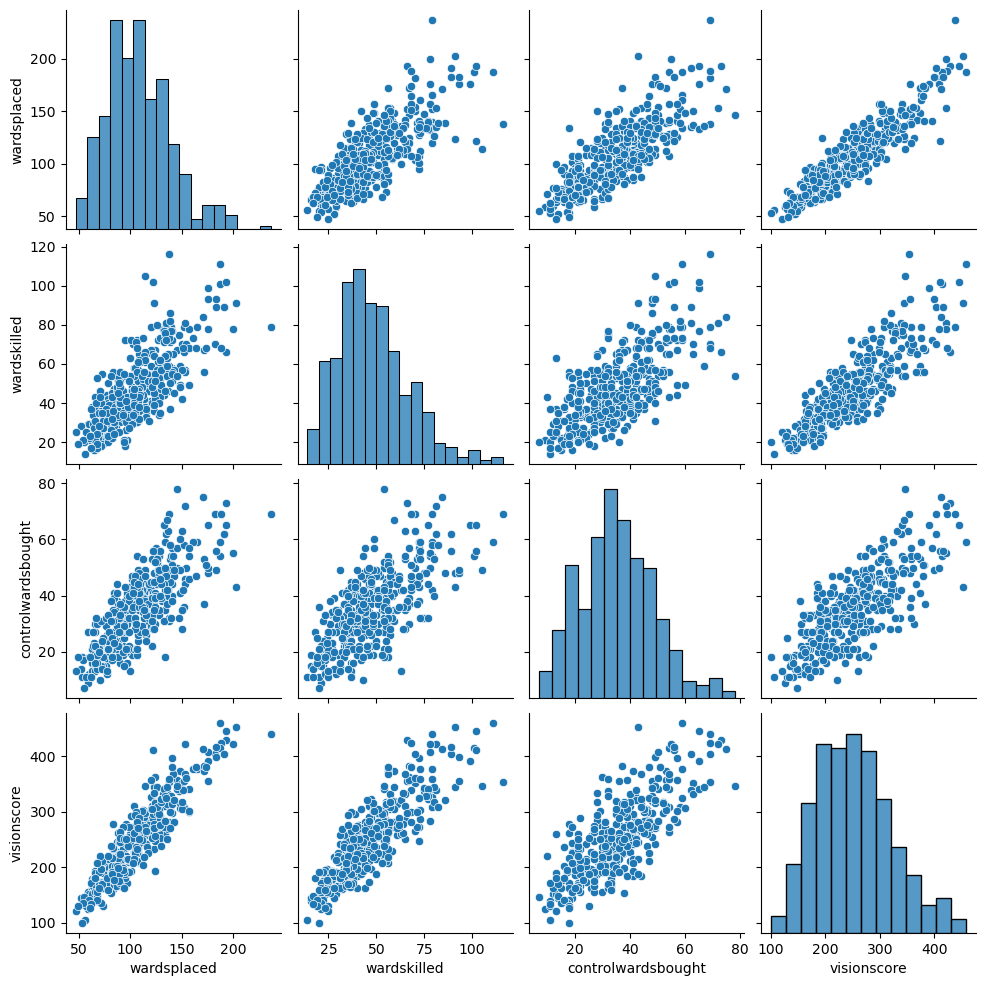

In [188]:
plot_pairplot(BlueTeamLoseDF,['wardsplaced', 'wardskilled', 'controlwardsbought', 'visionscore']);

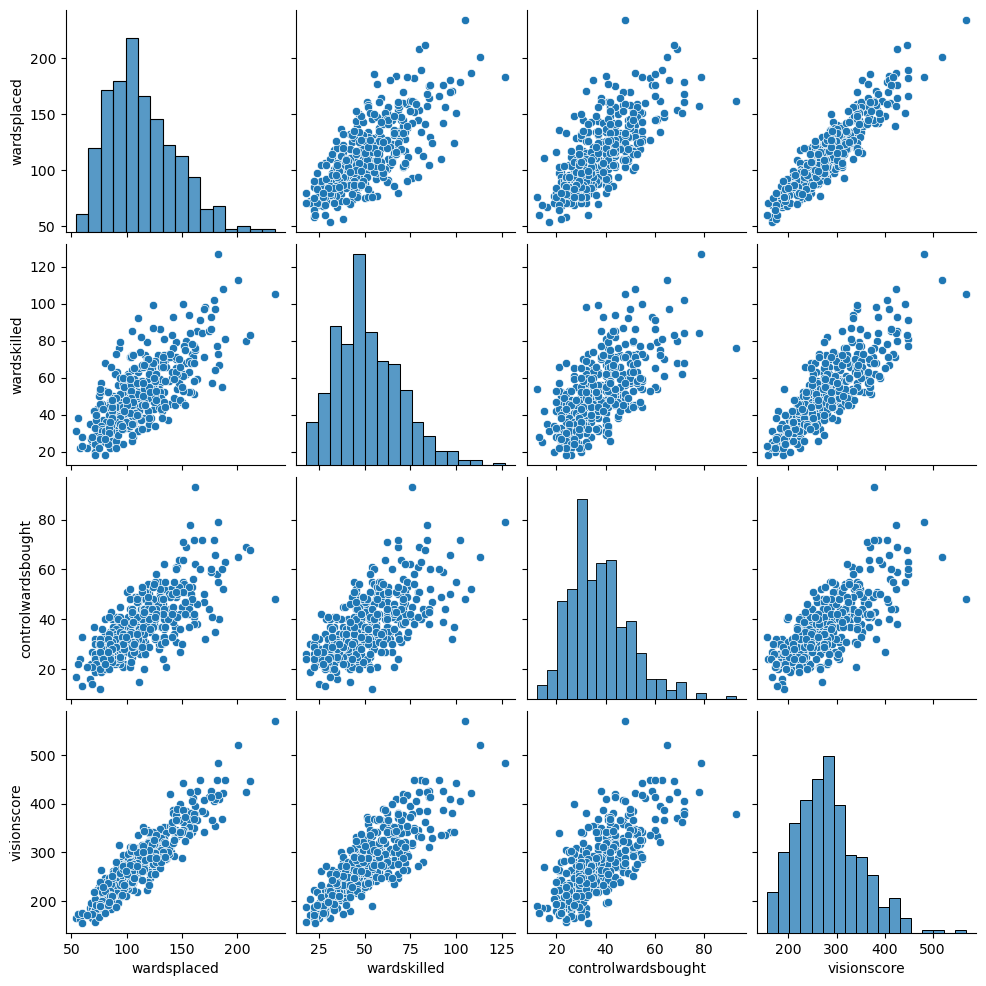

In [189]:
plot_pairplot(RedTeamWinDF,['wardsplaced', 'wardskilled', 'controlwardsbought', 'visionscore']);

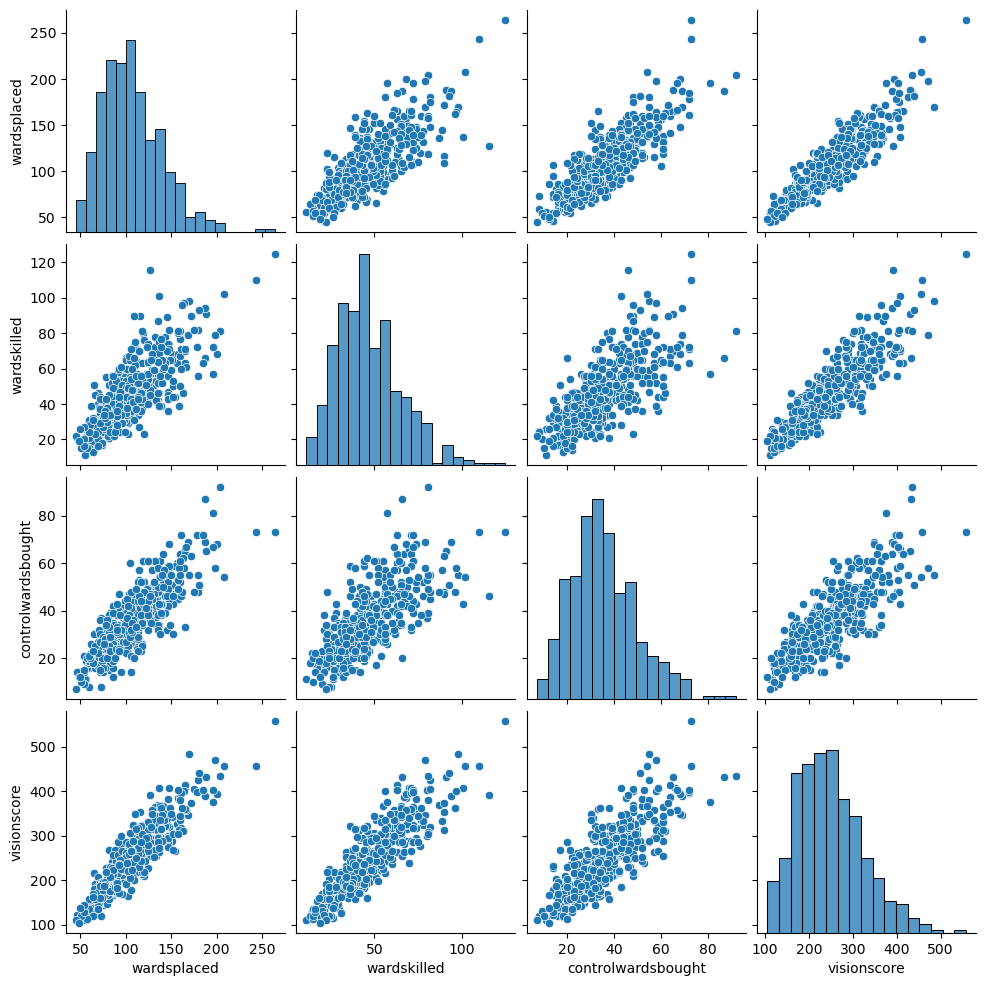

In [190]:
plot_pairplot(RedTeamLoseDF,['wardsplaced', 'wardskilled', 'controlwardsbought', 'visionscore']);

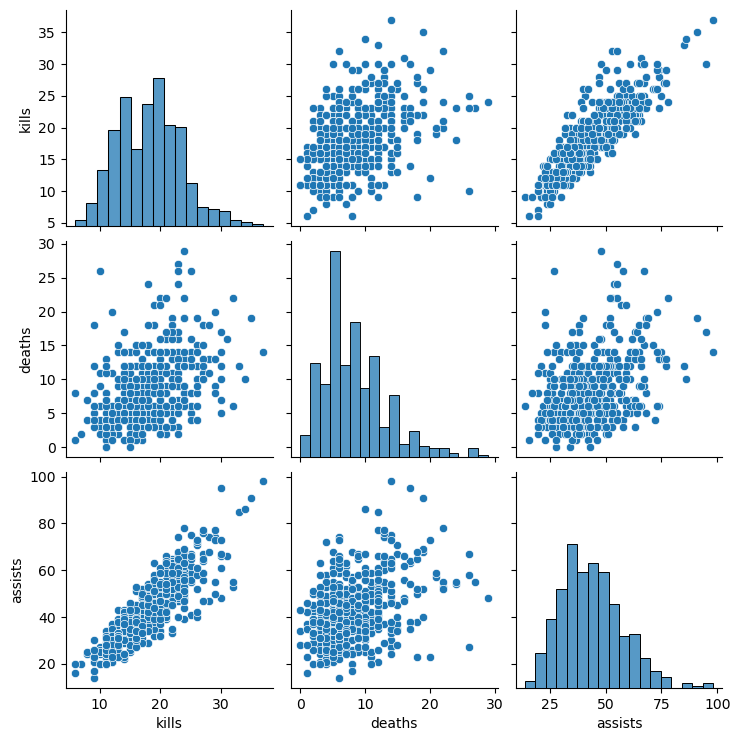

In [191]:
CompareValue = ['kills', 'deaths', 'assists'];

# Compare kill/death/assist amount (Win team at blue side)
plot_pairplot(BlueTeamWinDF, CompareValue);

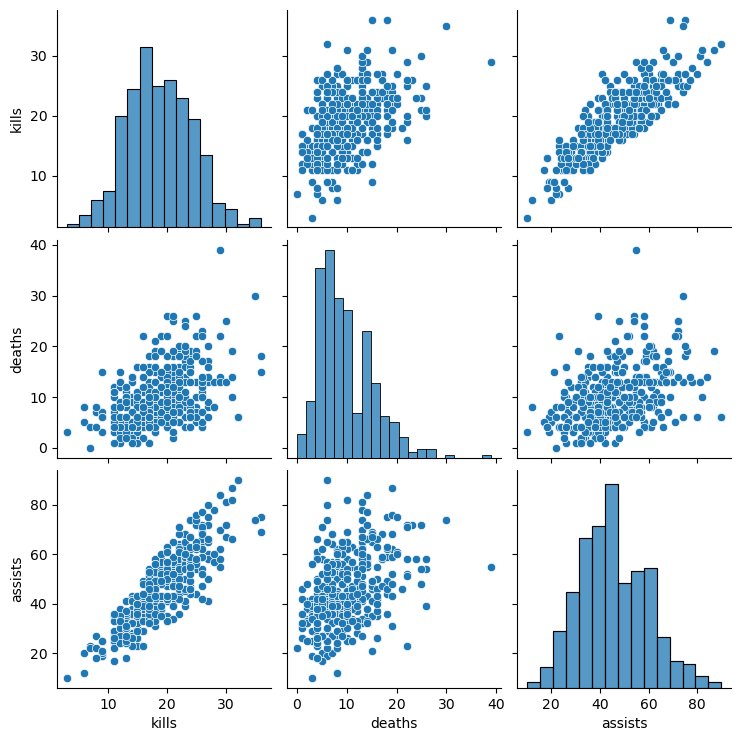

In [193]:
# Compare kill/death/assist amount (Win team at red side)
plot_pairplot(RedTeamWinDF, CompareValue);

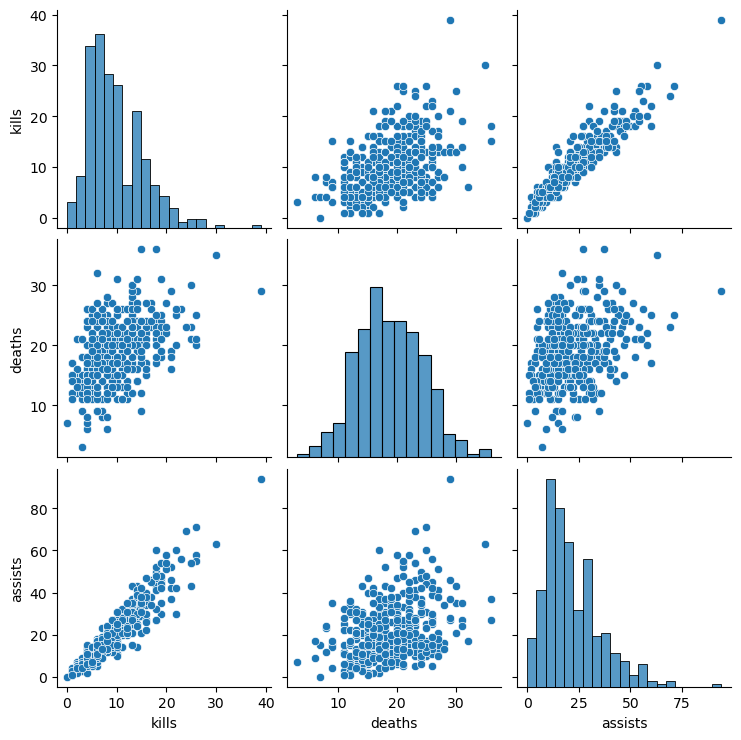

In [194]:
# Compare kill/death/assist amount (Lose team at blue side)
plot_pairplot(BlueTeamLoseDF, CompareValue);

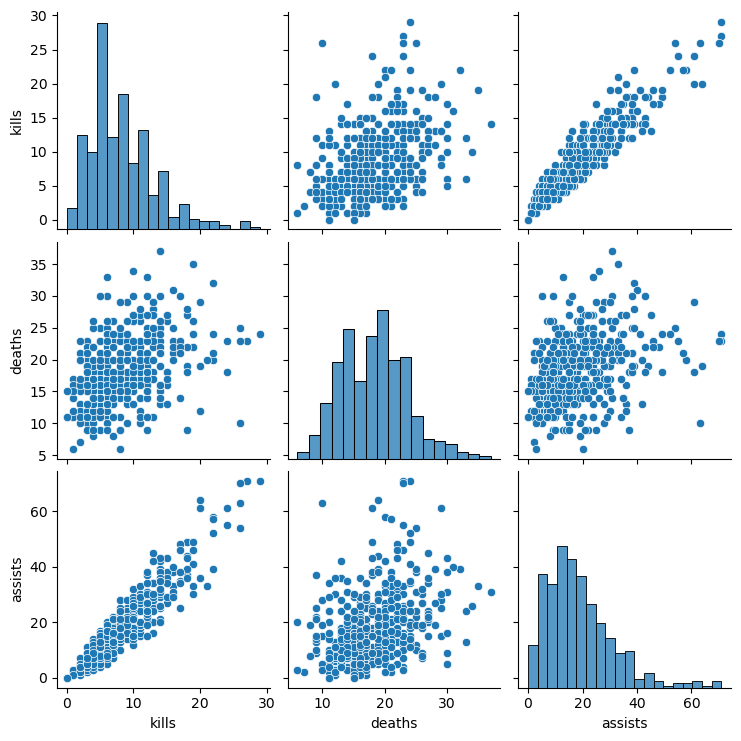

In [195]:
# Compare kill/death/assist amount (Lose team at red side)
plot_pairplot(RedTeamLoseDF, CompareValue);

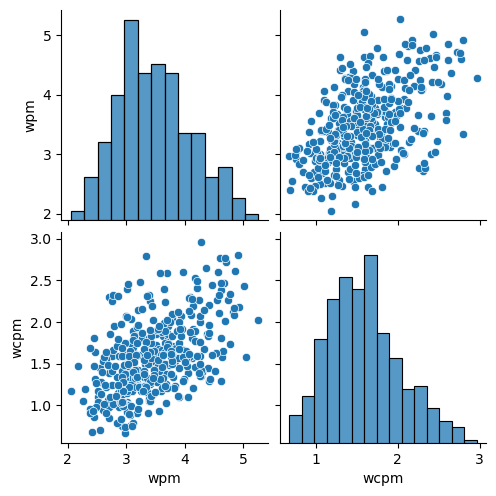

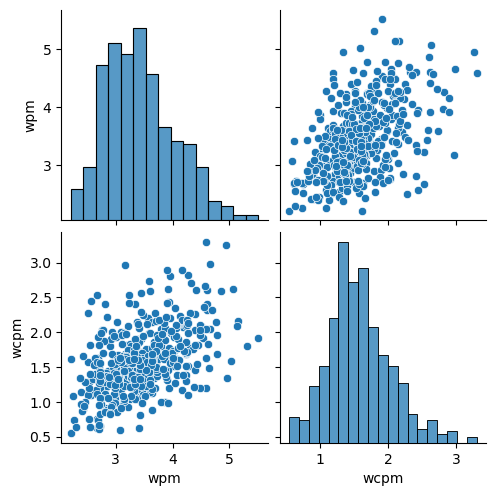

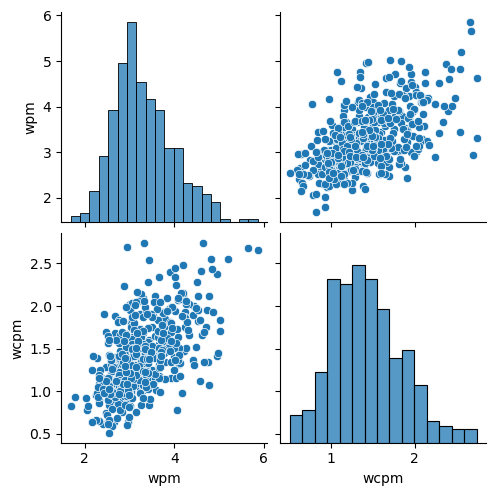

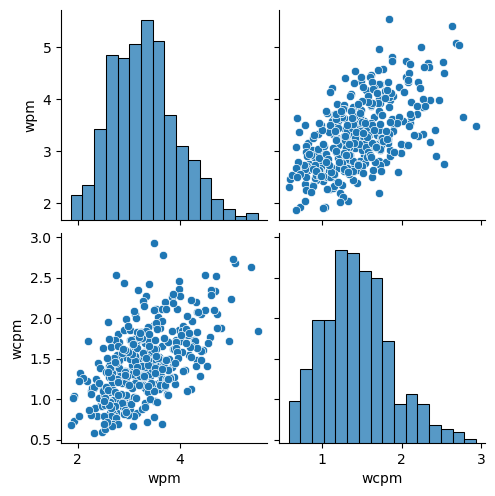

In [197]:
CompareValue = ['wpm','wcpm'];

# Remarks: wpm refers to Ward Placed per minutes, wcpm refers to Wards Cleared per minutes
plot_pairplot(RedTeamWinDF, CompareValue);
plot_pairplot(BlueTeamWinDF, CompareValue);
plot_pairplot(RedTeamLoseDF, CompareValue);
plot_pairplot(BlueTeamLoseDF, CompareValue);

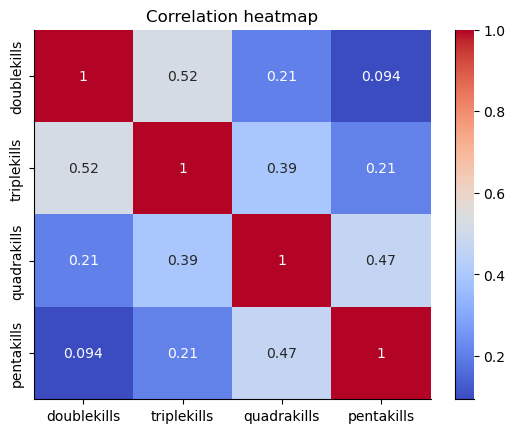

In [204]:
# Here explain the relation between get double kills to get penta kills
plot_heatmap(df.iloc[:, 22:26]);

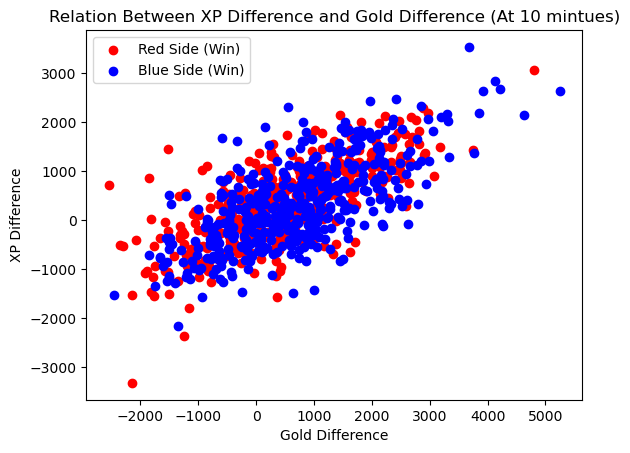

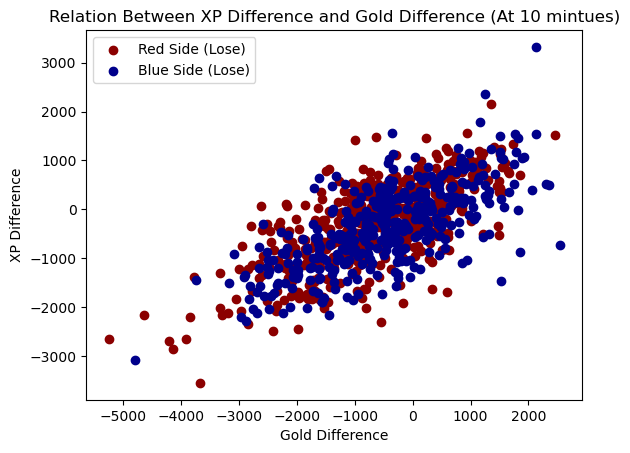

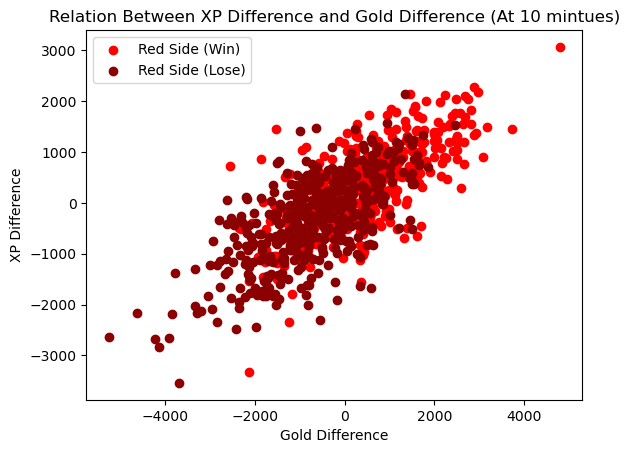

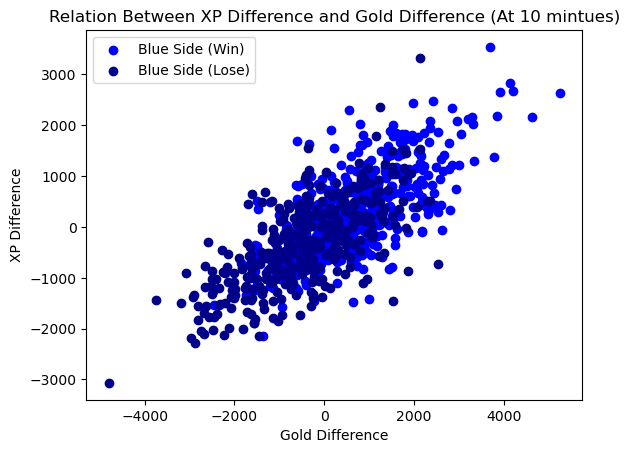

In [61]:
LabelX = 'Gold Difference';
LabelY = 'XP Difference';
Title = 'Relation Between XP Difference and Gold Difference';

# Compare xp difference and gold earned difference at 10 min (Win Team at both side)
plot_scatterplot(RedTeamWinDF, BlueTeamWinDF, 'golddiffat10', 'xpdiffat10', 'red', 'blue', RedWin, BlueWin,
            LabelX, LabelY, Title + ' (At 10 mintues)');

# Compare xp difference and gold earned difference at 10 min (Lose Team at both side)
plot_scatterplot(RedTeamLoseDF, BlueTeamLoseDF,'golddiffat10', 'xpdiffat10', 'darkred', 'darkblue',RedLose, BlueLose,
            LabelX, LabelY, Title + ' (At 10 mintues)');

# Compare xp difference and gold earned difference at 10 min (At Red side)
plot_scatterplot(RedTeamWinDF, RedTeamLoseDF, 'golddiffat10', 'xpdiffat10', 'red', 'darkred', RedWin, RedLose, 
            LabelX, LabelY, Title + ' (At 10 mintues)');

# Compare xp difference and gold earned difference at 10 min (At Blue side)
plot_scatterplot(BlueTeamWinDF, BlueTeamLoseDF, 'golddiffat10', 'xpdiffat10', 'blue', 'darkblue', BlueWin, BlueLose, 
            LabelX, LabelY, Title + ' (At 10 mintues)');

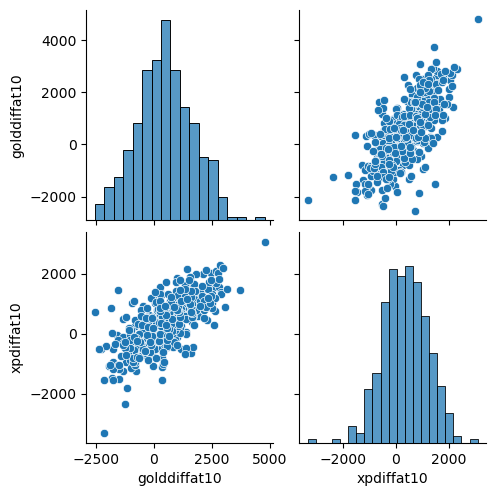

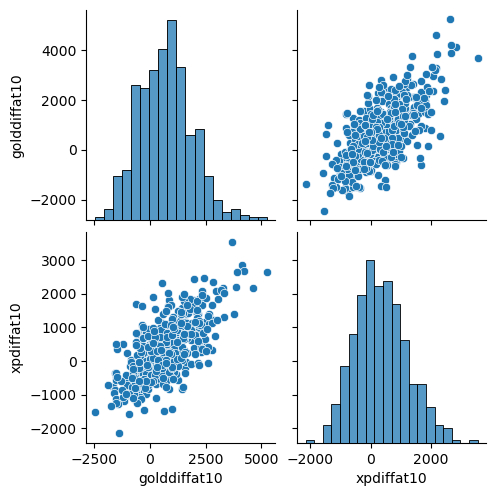

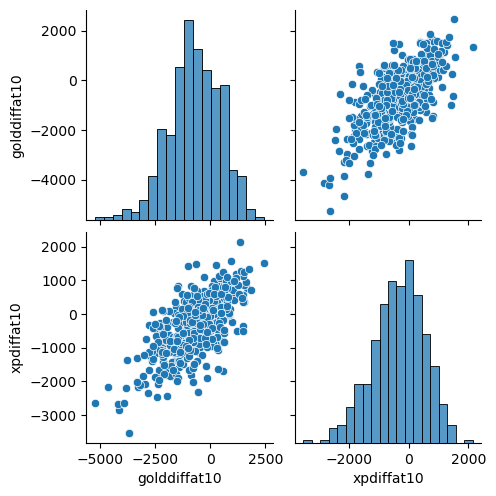

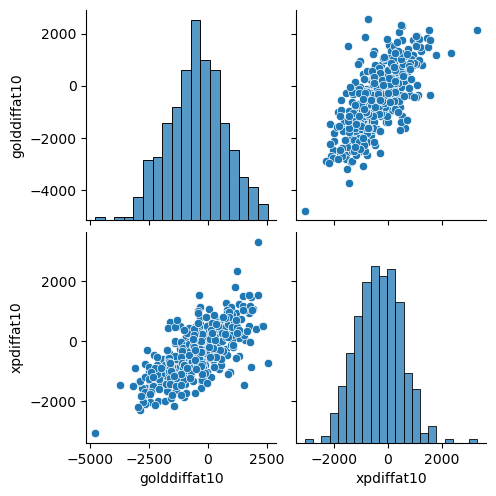

In [62]:
CompareValue = ['golddiffat10','xpdiffat10'];

plot_pairplot(RedTeamWinDF, CompareValue);
plot_pairplot(BlueTeamWinDF, CompareValue);
plot_pairplot(RedTeamLoseDF, CompareValue);
plot_pairplot(BlueTeamLoseDF, CompareValue);

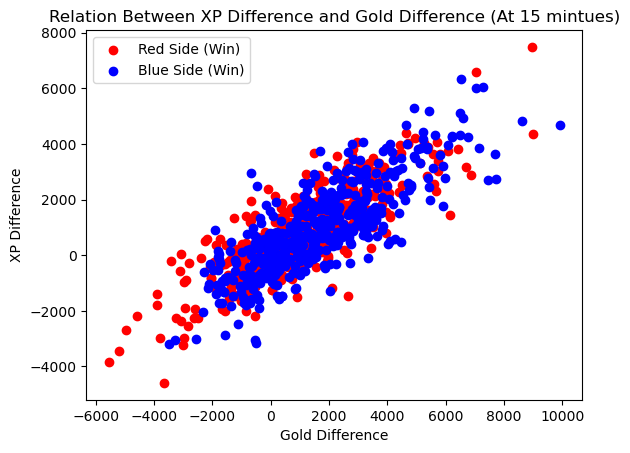

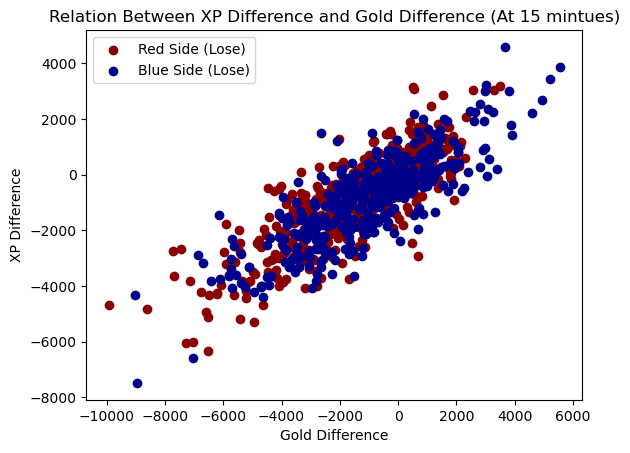

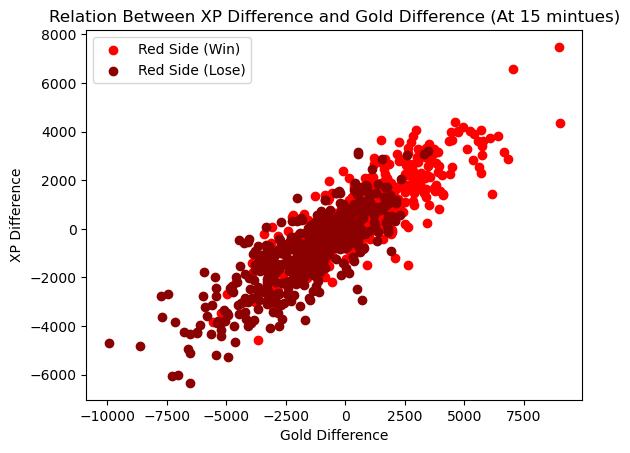

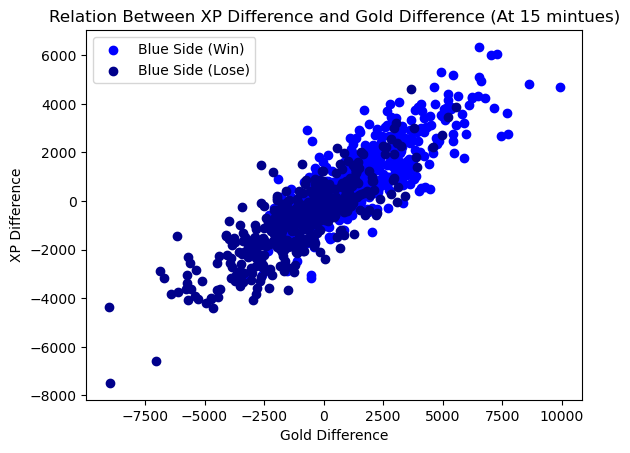

In [63]:
# Compare xp difference and gold earned difference at 15 min (Win Team at both side)
plot_scatterplot(RedTeamWinDF, BlueTeamWinDF, 'golddiffat15', 'xpdiffat15', 'red', 'blue', RedWin, BlueWin,
            LabelX, LabelY, Title + ' (At 15 mintues)');

# Compare xp difference and gold earned difference at 15 min (Lose Team at both side)
plot_scatterplot(RedTeamLoseDF, BlueTeamLoseDF,'golddiffat15', 'xpdiffat15', 'darkred', 'darkblue',RedLose, BlueLose,
            LabelX, LabelY, Title + ' (At 15 mintues)');

# Compare xp difference and gold earned difference at 15 min (At Red side)
plot_scatterplot(RedTeamWinDF, RedTeamLoseDF, 'golddiffat15', 'xpdiffat15', 'red', 'darkred', RedWin, RedLose, 
            LabelX, LabelY, Title + ' (At 15 mintues)');

# Compare xp difference and gold earned difference at 15 min (At Blue side)
plot_scatterplot(BlueTeamWinDF, BlueTeamLoseDF, 'golddiffat15', 'xpdiffat15', 'blue', 'darkblue', BlueWin, BlueLose, 
            LabelX, LabelY, Title + ' (At 15 mintues)');

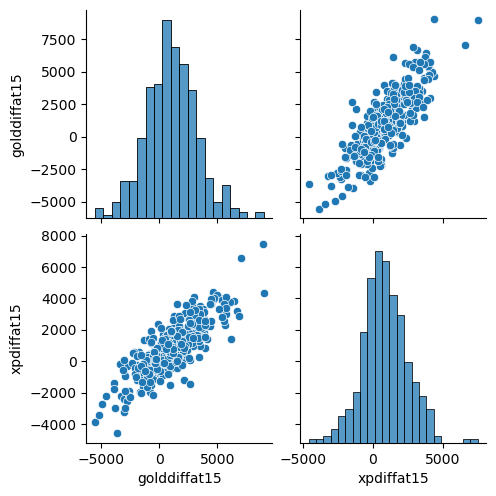

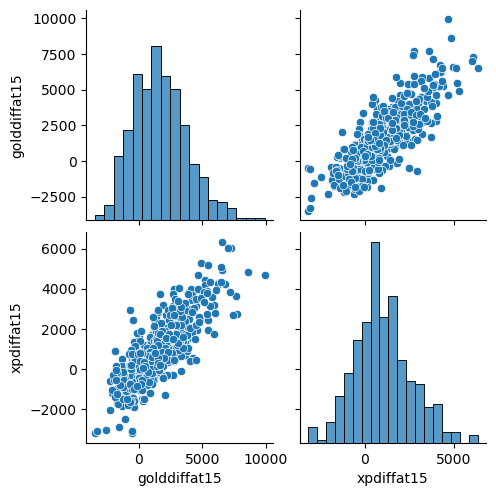

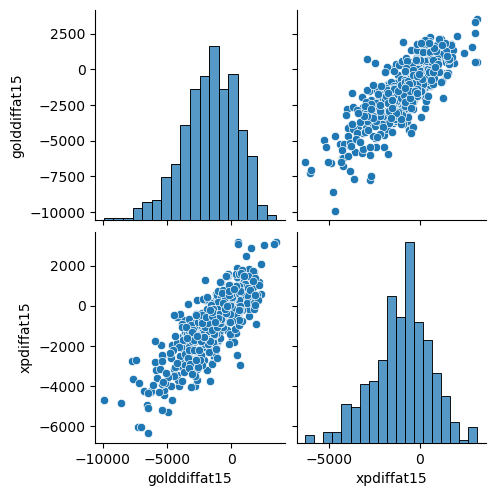

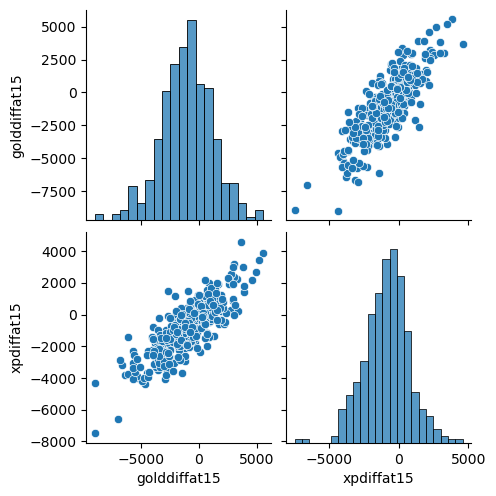

In [64]:
CompareValue = ['golddiffat15','xpdiffat15'];

plot_pairplot(RedTeamWinDF, CompareValue);
plot_pairplot(BlueTeamWinDF, CompareValue);
plot_pairplot(RedTeamLoseDF, CompareValue);
plot_pairplot(BlueTeamLoseDF, CompareValue);

In [85]:
# There are 2 types of data (Player and Team)
PlayerDF = df[df['position'] != 'team'];
PlayerDF = PlayerDF.reset_index();
PlayerDF.index = PlayerDF.index + 1;
PlayerDF = PlayerDF.dropna(axis=1, how='all');
print(PlayerDF);

      index  Unnamed: 0 league  year    split             date  game  side  \
1         0         216    LEC  2024   Winter  13/1/2024 16:10     1  Blue   
2         1         217    LEC  2024   Winter  13/1/2024 16:10     1  Blue   
3         2         218    LEC  2024   Winter  13/1/2024 16:10     1  Blue   
4         3         219    LEC  2024   Winter  13/1/2024 16:10     1  Blue   
5         4         220    LEC  2024   Winter  13/1/2024 16:10     1  Blue   
...     ...         ...    ...   ...      ...              ...   ...   ...   
8356  10025       12269    LCO  2024  Split 1  13/2/2024 10:28     2   Red   
8357  10026       12270    LCO  2024  Split 1  13/2/2024 10:28     2   Red   
8358  10027       12271    LCO  2024  Split 1  13/2/2024 10:28     2   Red   
8359  10028       12272    LCO  2024  Split 1  13/2/2024 10:28     2   Red   
8360  10029       12273    LCO  2024  Split 1  13/2/2024 10:28     2   Red   

     position  playername  ... deathsat10 goldat15  xpat15 csat

In [95]:
# Convert the flit out data to csv
PlayerDF.to_csv('s14_Player_match_data.csv');

csv_Data = pd.read_csv('s14_Player_match_data.csv');
PlayerDF = pd.DataFrame(csv_Data);

In [97]:
# There are 5 position in Game (Top, Jungle, Mid, Bot Support)
TopPlayerDF = PlayerDF[PlayerDF['position'] == 'top'];
TopPlayerDF = TopPlayerDF.reset_index();
TopPlayerDF.index = TopPlayerDF.index + 1;
TopPlayerDF = TopPlayerDF.drop(columns=['index']);
print(TopPlayerDF);

      level_0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 league  year    split  \
1           0             0             1         216    LEC  2024   Winter   
2           5             5             6         221    LEC  2024   Winter   
3          10            10            11         228    LEC  2024   Winter   
4          15            15            16         233    LEC  2024   Winter   
5          20            20            21         240    LEC  2024   Winter   
...       ...           ...           ...         ...    ...   ...      ...   
1668     8335          8335          8336       12245    LCO  2024  Split 1   
1669     8340          8340          8341       12252    LCO  2024  Split 1   
1670     8345          8345          8346       12257    LCO  2024  Split 1   
1671     8350          8350          8351       12264    LCO  2024  Split 1   
1672     8355          8355          8356       12269    LCO  2024  Split 1   

                 date  game  side  ... deathsat10 g

In [99]:
# There are 5 position in Game (Top, Jungle, Mid, Bot Support)
JunglePlayerDF = PlayerDF[PlayerDF['position'] == 'jng'];
JunglePlayerDF = JunglePlayerDF.reset_index();
JunglePlayerDF.index = JunglePlayerDF.index + 1;
JunglePlayerDF = JunglePlayerDF.drop(columns=['index']);
print(JunglePlayerDF);

      level_0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 league  year    split  \
1           1             1             2         217    LEC  2024   Winter   
2           6             6             7         222    LEC  2024   Winter   
3          11            11            12         229    LEC  2024   Winter   
4          16            16            17         234    LEC  2024   Winter   
5          21            21            22         241    LEC  2024   Winter   
...       ...           ...           ...         ...    ...   ...      ...   
1668     8336          8336          8337       12246    LCO  2024  Split 1   
1669     8341          8341          8342       12253    LCO  2024  Split 1   
1670     8346          8346          8347       12258    LCO  2024  Split 1   
1671     8351          8351          8352       12265    LCO  2024  Split 1   
1672     8356          8356          8357       12270    LCO  2024  Split 1   

                 date  game  side  ... deathsat10 g

In [101]:
# There are 5 position in Game (Top, Jungle, Mid, Bot Support)
MidPlayerDF = PlayerDF[PlayerDF['position'] == 'mid'];
MidPlayerDF = MidPlayerDF.reset_index();
MidPlayerDF.index = MidPlayerDF.index + 1;
MidPlayerDF = MidPlayerDF.drop(columns=['index']);
print(MidPlayerDF);

      level_0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 league  year    split  \
1           2             2             3         218    LEC  2024   Winter   
2           7             7             8         223    LEC  2024   Winter   
3          12            12            13         230    LEC  2024   Winter   
4          17            17            18         235    LEC  2024   Winter   
5          22            22            23         242    LEC  2024   Winter   
...       ...           ...           ...         ...    ...   ...      ...   
1668     8337          8337          8338       12247    LCO  2024  Split 1   
1669     8342          8342          8343       12254    LCO  2024  Split 1   
1670     8347          8347          8348       12259    LCO  2024  Split 1   
1671     8352          8352          8353       12266    LCO  2024  Split 1   
1672     8357          8357          8358       12271    LCO  2024  Split 1   

                 date  game  side  ... deathsat10 g

In [103]:
# There are 5 position in Game (Top, Jungle, Mid, Bot Support)
BotPlayerDF = PlayerDF[PlayerDF['position'] == 'bot'];
BotPlayerDF = BotPlayerDF.reset_index();
BotPlayerDF.index = BotPlayerDF.index + 1;
BotPlayerDF = BotPlayerDF.drop(columns=['index']);
print(BotPlayerDF);

      level_0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 league  year    split  \
1           3             3             4         219    LEC  2024   Winter   
2           8             8             9         224    LEC  2024   Winter   
3          13            13            14         231    LEC  2024   Winter   
4          18            18            19         236    LEC  2024   Winter   
5          23            23            24         243    LEC  2024   Winter   
...       ...           ...           ...         ...    ...   ...      ...   
1668     8338          8338          8339       12248    LCO  2024  Split 1   
1669     8343          8343          8344       12255    LCO  2024  Split 1   
1670     8348          8348          8349       12260    LCO  2024  Split 1   
1671     8353          8353          8354       12267    LCO  2024  Split 1   
1672     8358          8358          8359       12272    LCO  2024  Split 1   

                 date  game  side  ... deathsat10 g

In [105]:
# There are 5 position in Game (Top, Jungle, Mid, Bot Support)
SupPlayerDF = PlayerDF[PlayerDF['position'] == 'sup'];
SupPlayerDF = SupPlayerDF.reset_index();
SupPlayerDF.index = SupPlayerDF.index + 1;
SupPlayerDF = SupPlayerDF.drop(columns=['index']);
print(SupPlayerDF);

      level_0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 league  year    split  \
1           4             4             5         220    LEC  2024   Winter   
2           9             9            10         225    LEC  2024   Winter   
3          14            14            15         232    LEC  2024   Winter   
4          19            19            20         237    LEC  2024   Winter   
5          24            24            25         244    LEC  2024   Winter   
...       ...           ...           ...         ...    ...   ...      ...   
1668     8339          8339          8340       12249    LCO  2024  Split 1   
1669     8344          8344          8345       12256    LCO  2024  Split 1   
1670     8349          8349          8350       12261    LCO  2024  Split 1   
1671     8354          8354          8355       12268    LCO  2024  Split 1   
1672     8359          8359          8360       12273    LCO  2024  Split 1   

                 date  game  side  ... deathsat10 g

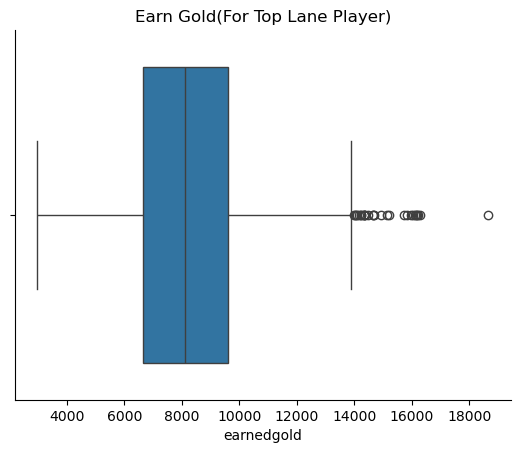

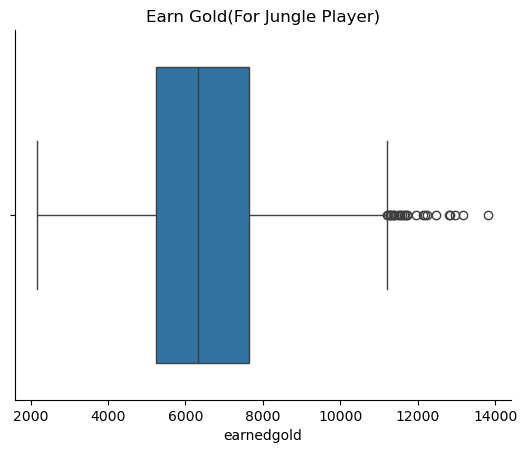

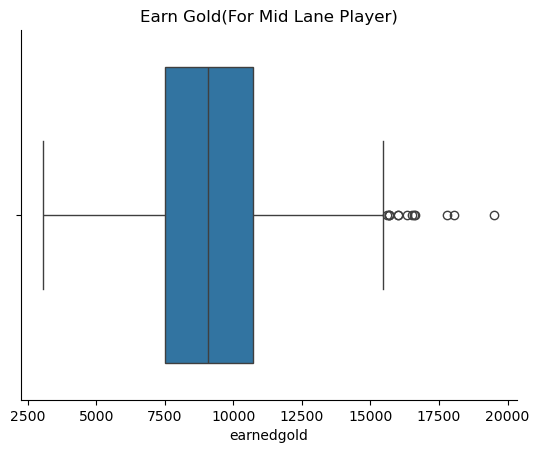

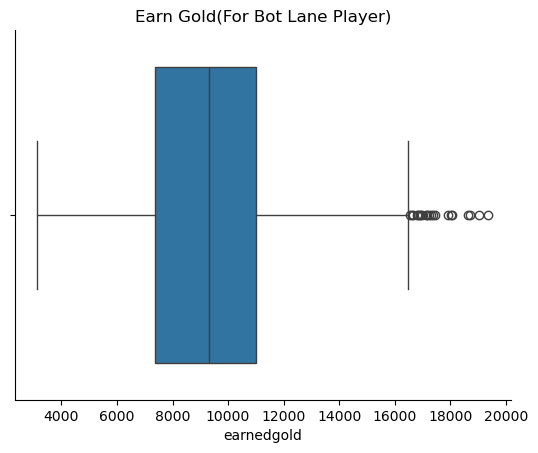

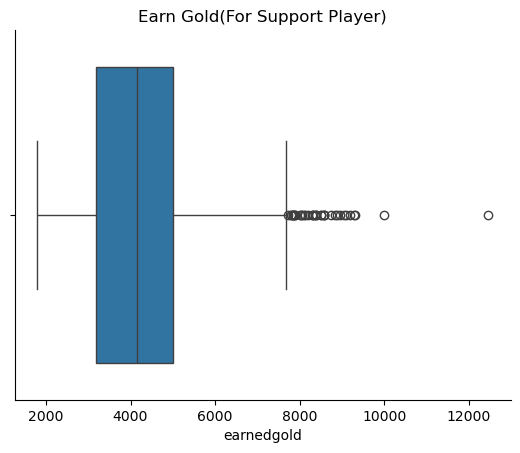

In [107]:
Title = 'Earn Gold'

# Compare gold earned for top lane player
plot_boxplot(TopPlayerDF, 'earnedgold', Title + '(For Top Lane Player)');

# Compare gold earned for jungle player
plot_boxplot(JunglePlayerDF, 'earnedgold', Title + '(For Jungle Player)');

# Compare gold earned for mid lane player
plot_boxplot(MidPlayerDF, 'earnedgold', Title + '(For Mid Lane Player)');

# Compare gold earned for bot lane player
plot_boxplot(BotPlayerDF, 'earnedgold', Title + '(For Bot Lane Player)');

# Compare gold earned for support player
plot_boxplot(SupPlayerDF, 'earnedgold', Title + '(For Support Player)');

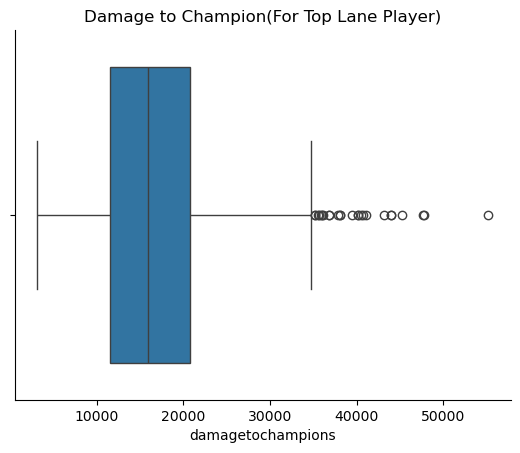

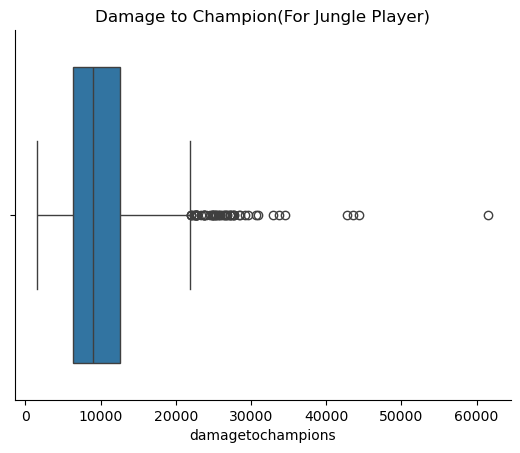

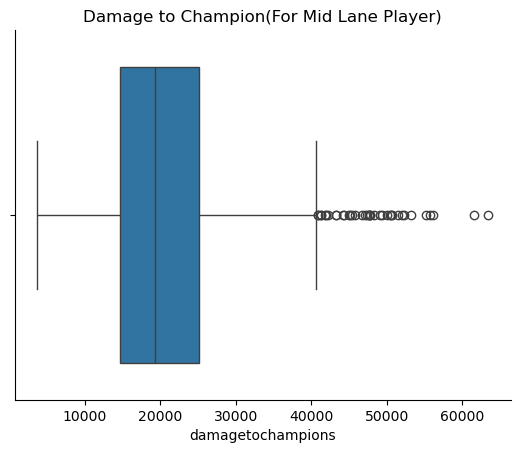

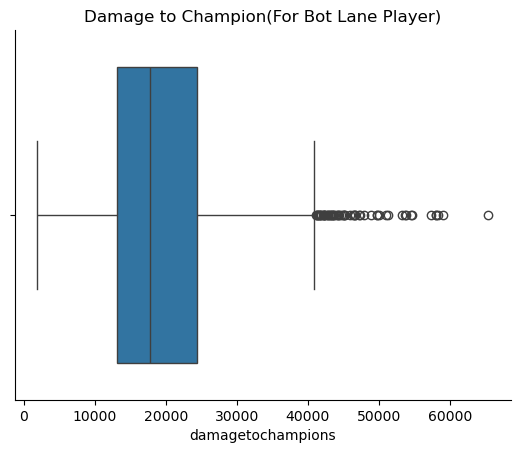

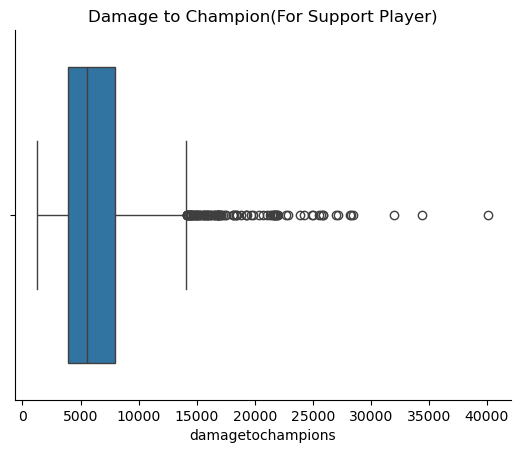

In [109]:
# Most of time, top/mid/bot lane player may dealt more damage to champion
# Bacause top/mid/sup player might be a tank, which cannot dealt lots of damage to champions

Title = 'Damage to Champion'
CompareValue = 'damagetochampions';

# Compare gold earned for top lane player
plot_boxplot(TopPlayerDF, CompareValue, Title + '(For Top Lane Player)');

# Compare gold earned for jungle player
plot_boxplot(JunglePlayerDF, CompareValue, Title + '(For Jungle Player)');

# Compare gold earned for mid lane player
plot_boxplot(MidPlayerDF, CompareValue, Title + '(For Mid Lane Player)');

# Compare gold earned for bot lane player
plot_boxplot(BotPlayerDF, CompareValue, Title + '(For Bot Lane Player)');

# Compare gold earned for support player
plot_boxplot(SupPlayerDF, CompareValue, Title + '(For Support Player)');

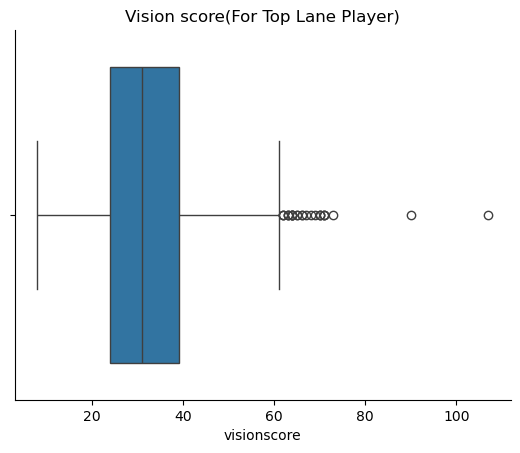

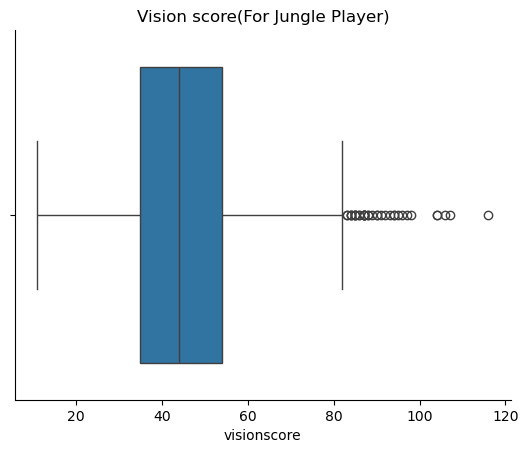

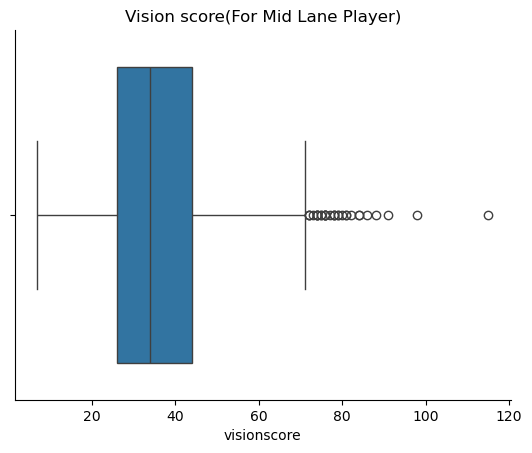

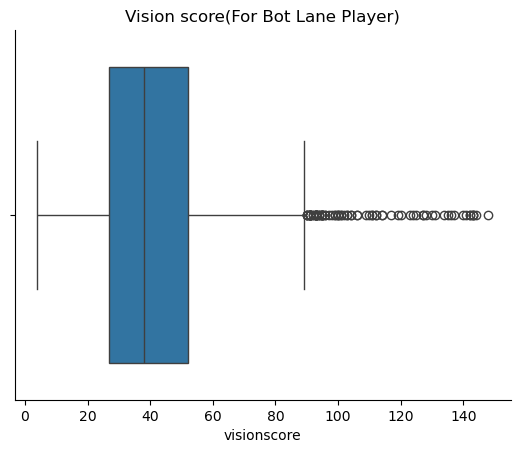

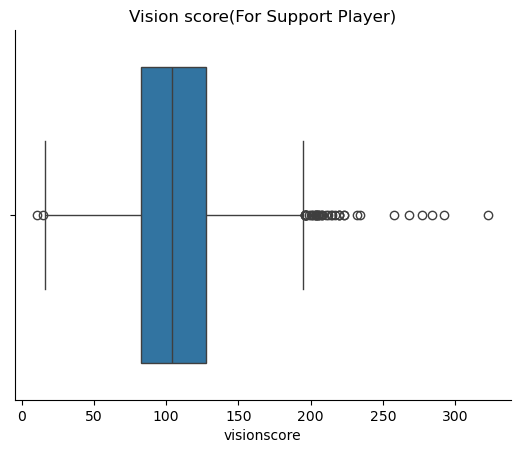

In [77]:
Title = 'Vision score';
CompareValue = 'visionscore';

# Compare vision score for top lane player
plot_boxplot(TopPlayerDF, CompareValue, Title + '(For Top Lane Player)');

# Compare vision score for jungle player
plot_boxplot(JunglePlayerDF, CompareValue, Title + '(For Jungle Player)');

# Comparevision score for mid lane player
plot_boxplot(MidPlayerDF, CompareValue, Title + '(For Mid Lane Player)');

# Compare vision score for bot lane player
plot_boxplot(BotPlayerDF, CompareValue, Title + '(For Bot Lane Player)');

# Compare vision score for support player
plot_boxplot(SupPlayerDF, CompareValue, Title + '(For Support Player)');

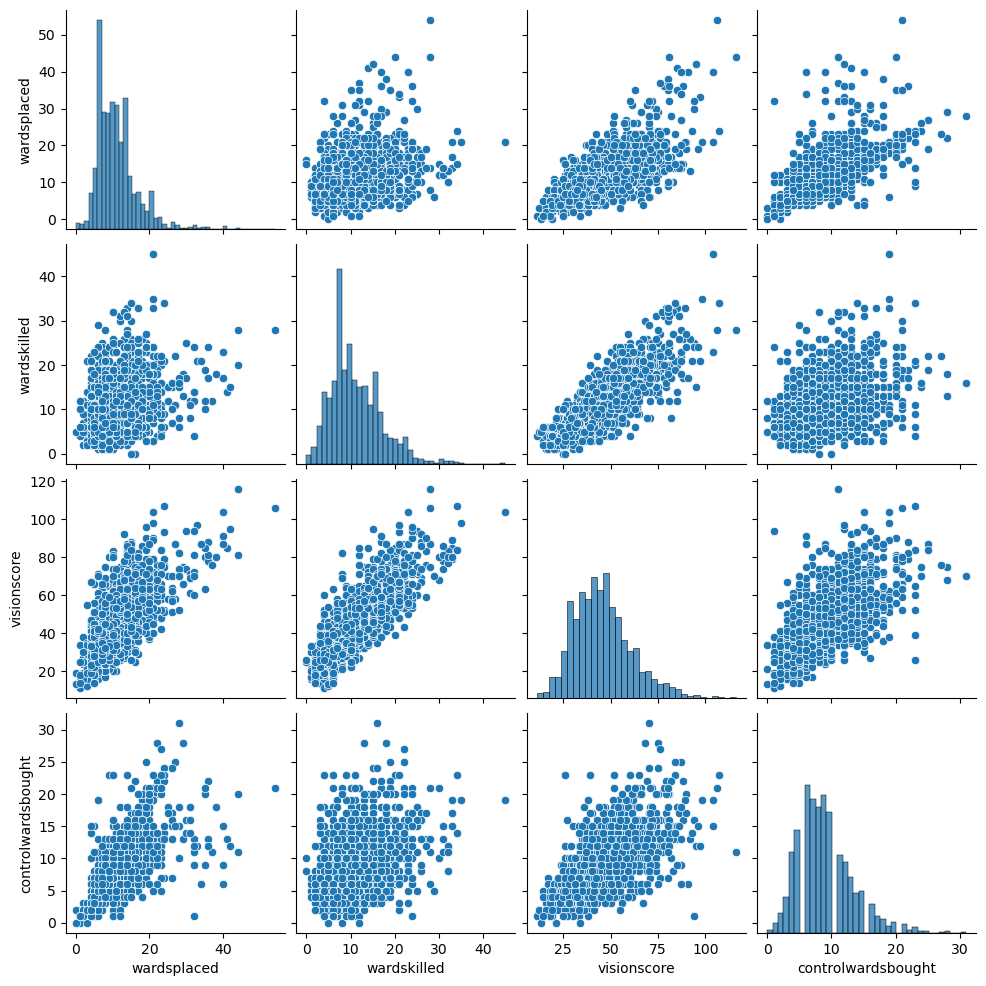

In [79]:
# Most of time, support and jungle player complete vision control 
# Fog of War let both side user cannot view the area, and support player should place ward/control ward to keep the area vision
CompareValue = ['wardsplaced', 'wardskilled', 'visionscore', 'controlwardsbought'];

# Compare vision score for jungle player
plot_pairplot(JunglePlayerDF,CompareValue);

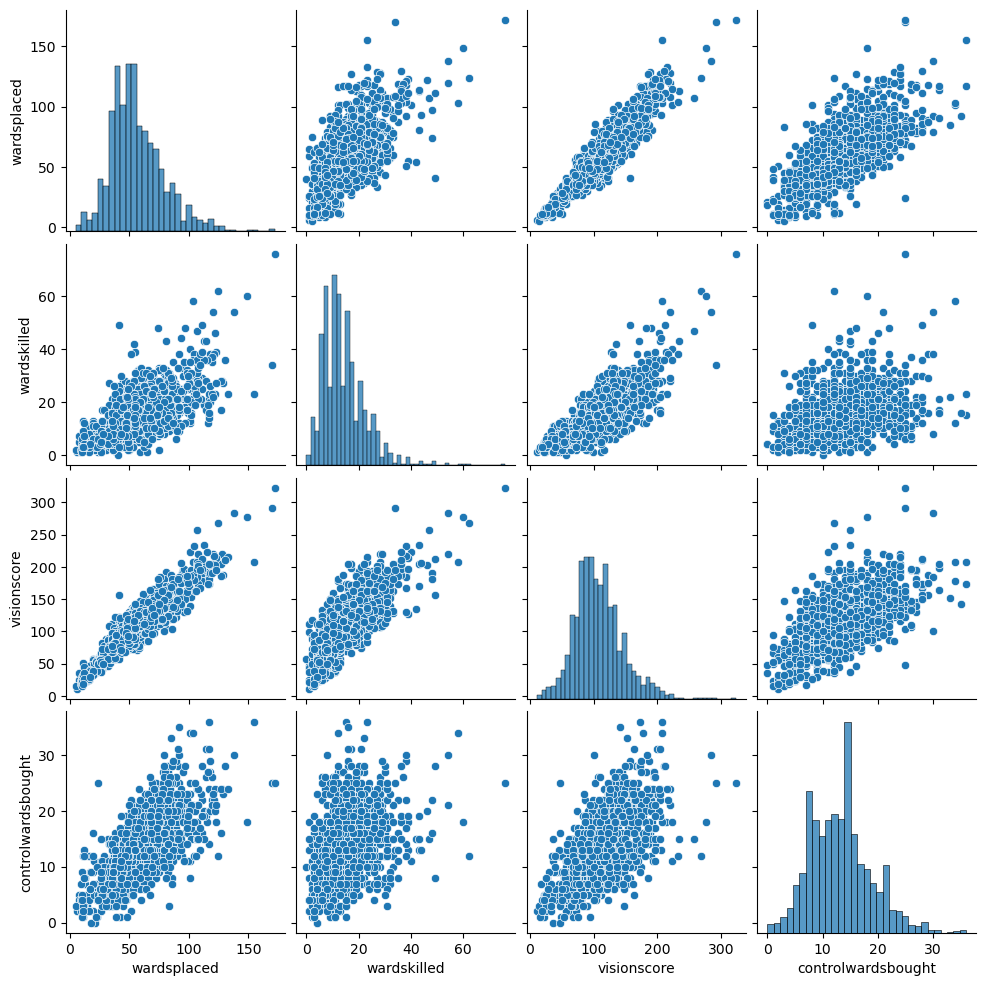

In [80]:
# Compare vision score for support player
plot_pairplot(SupPlayerDF, CompareValue);

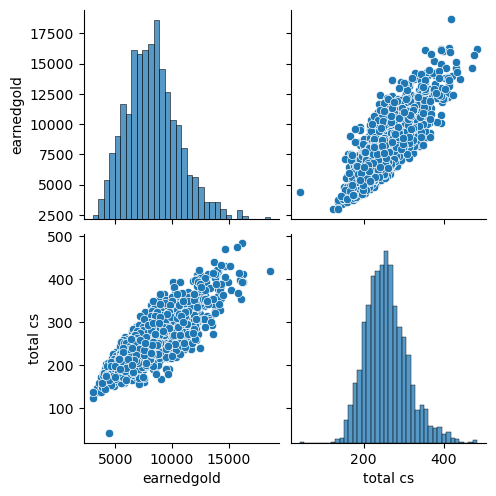

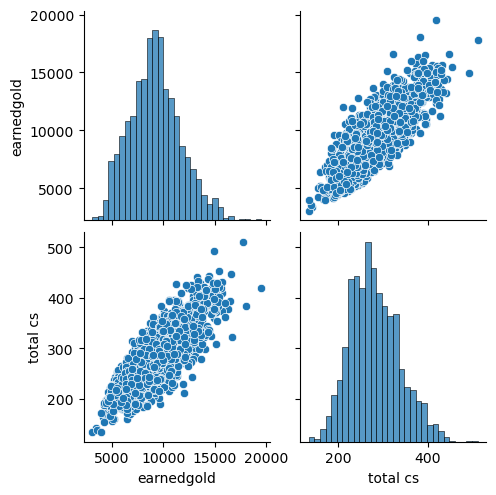

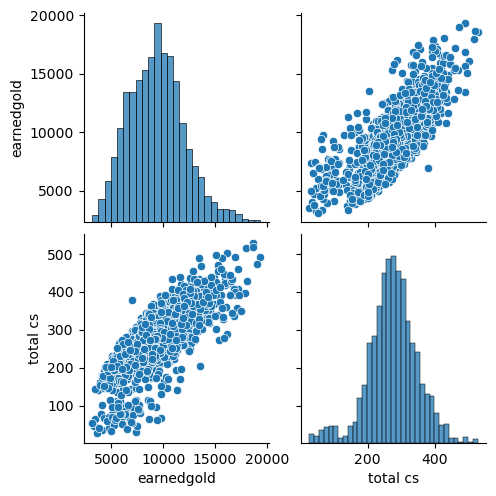

In [82]:
# cs mean minion kills, most of player can earn gold from chapion kills, kill assist and kill minion
# Remarks: Except jungle and support player
CompareValue = ['earnedgold', 'total cs'];

# Compare cs and gold earned from top lane player
plot_pairplot(TopPlayerDF, CompareValue);

# Compare cs and gold earned from mid lane player
plot_pairplot(MidPlayerDF, CompareValue);

# Compare cs and gold earned from bot lane player
plot_pairplot(BotPlayerDF, CompareValue);